# Analysis of results for the GCN with Synth data

In [1]:
# imports needed:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from statistics import stdev as std
from scipy import stats
import random
import math
import modcomp
import json
import numpy as np

random.seed(0)

## Read in data:

In [2]:
results_filtered_1 = pd.read_csv("../results/GCN/test_synth_filtered_final/synth_1/results.csv")
results_filtered_2 = pd.read_csv("../results/GCN/test_synth_filtered_final/synth_2/results.csv")
results_filtered_3 = pd.read_csv("../results/GCN/test_synth_filtered_final/synth_3/results.csv")
results_filtered_4 = pd.read_csv("../results/GCN/test_synth_filtered_final/synth_4/results.csv")
results_filtered_5 = pd.read_csv("../results/GCN/test_synth_filtered_final/synth_5/results.csv")
results_filtered_6 = pd.read_csv("../results/GCN/test_synth_filtered_final/synth_6/results.csv")
results_filtered_7 = pd.read_csv("../results/GCN/test_synth_filtered_final/synth_7/results.csv")
results_filtered_8 = pd.read_csv("../results/GCN/test_synth_filtered_final/synth_8/results.csv")
results_filtered_9 = pd.read_csv("../results/GCN/test_synth_filtered_final/synth_9/results.csv")
results_filtered_10 = pd.read_csv("../results/GCN/test_synth_filtered_final/synth_10/results.csv")

results_alltoone_1 = pd.read_csv("../results/GCN/test_synth_all-to-one_final/synth_1/results.csv")
results_alltoone_2 = pd.read_csv("../results/GCN/test_synth_all-to-one_final/synth_2/results.csv")
results_alltoone_3 = pd.read_csv("../results/GCN/test_synth_all-to-one_final/synth_3/results.csv")
results_alltoone_4 = pd.read_csv("../results/GCN/test_synth_all-to-one_final/synth_4/results.csv")
results_alltoone_5 = pd.read_csv("../results/GCN/test_synth_all-to-one_final/synth_5/results.csv")
results_alltoone_6 = pd.read_csv("../results/GCN/test_synth_all-to-one_final/synth_6/results.csv")
results_alltoone_7 = pd.read_csv("../results/GCN/test_synth_all-to-one_final/synth_7/results.csv")
results_alltoone_8 = pd.read_csv("../results/GCN/test_synth_all-to-one_final/synth_8/results.csv")
results_alltoone_9 = pd.read_csv("../results/GCN/test_synth_all-to-one_final/synth_9/results.csv")
results_alltoone_10 = pd.read_csv("../results/GCN/test_synth_all-to-one_final/synth_10/results.csv")

results_collapsed_1 = pd.read_csv("../results/GCN/test_synth_collapsed_final/synth_1/results.csv")
results_collapsed_2 = pd.read_csv("../results/GCN/test_synth_collapsed_final/synth_2/results.csv")
results_collapsed_3 = pd.read_csv("../results/GCN/test_synth_collapsed_final/synth_3/results.csv")
results_collapsed_4 = pd.read_csv("../results/GCN/test_synth_collapsed_final/synth_4/results.csv")
results_collapsed_5 = pd.read_csv("../results/GCN/test_synth_collapsed_final/synth_5/results.csv")
results_collapsed_6 = pd.read_csv("../results/GCN/test_synth_collapsed_final/synth_6/results.csv")
results_collapsed_7 = pd.read_csv("../results/GCN/test_synth_collapsed_final/synth_7/results.csv")
results_collapsed_8 = pd.read_csv("../results/GCN/test_synth_collapsed_final/synth_8/results.csv")
results_collapsed_9 = pd.read_csv("../results/GCN/test_synth_collapsed_final/synth_9/results.csv")
results_collapsed_10 = pd.read_csv("../results/GCN/test_synth_collapsed_final/synth_10/results.csv")

results_separate_1 = pd.read_csv("../results/GCN/test_synth_separate_final/synth_1/results.csv")
results_separate_2 = pd.read_csv("../results/GCN/test_synth_separate_final/synth_2/results.csv")
results_separate_3 = pd.read_csv("../results/GCN/test_synth_separate_final/synth_3/results.csv")
results_separate_4 = pd.read_csv("../results/GCN/test_synth_separate_final/synth_4/results.csv")
results_separate_5 = pd.read_csv("../results/GCN/test_synth_separate_final/synth_5/results.csv")
results_separate_6 = pd.read_csv("../results/GCN/test_synth_separate_final/synth_6/results.csv")
results_separate_7 = pd.read_csv("../results/GCN/test_synth_separate_final/synth_7/results.csv")
results_separate_8 = pd.read_csv("../results/GCN/test_synth_separate_final/synth_8/results.csv")
results_separate_9 = pd.read_csv("../results/GCN/test_synth_separate_final/synth_9/results.csv")
results_separate_10 = pd.read_csv("../results/GCN/test_synth_separate_final/synth_10/results.csv")

## Process data:

In [3]:
# combine the test accuracies
accuracy_test_filtered = pd.concat([results_filtered_1['AccTest'], results_filtered_2['AccTest'], results_filtered_3['AccTest'], results_filtered_4['AccTest'], results_filtered_5['AccTest'],results_filtered_6['AccTest'], results_filtered_7['AccTest'], results_filtered_8['AccTest'], results_filtered_9['AccTest'], results_filtered_10['AccTest']],axis=1)
accuracy_test_alltoone = pd.concat([results_alltoone_1['AccTest'], results_alltoone_2['AccTest'], results_alltoone_3['AccTest'], results_alltoone_4['AccTest'], results_alltoone_5['AccTest'],results_alltoone_6['AccTest'], results_alltoone_7['AccTest'], results_alltoone_8['AccTest'], results_alltoone_9['AccTest'], results_alltoone_10['AccTest']],axis=1)
accuracy_test_collapsed = pd.concat([results_collapsed_1['AccTest'], results_collapsed_2['AccTest'], results_collapsed_3['AccTest'], results_collapsed_4['AccTest'], results_collapsed_5['AccTest'],results_collapsed_6['AccTest'], results_collapsed_7['AccTest'], results_collapsed_8['AccTest'], results_collapsed_9['AccTest'], results_collapsed_10['AccTest']],axis=1)
accuracy_test_separate = pd.concat([results_separate_1['AccTest'], results_separate_2['AccTest'], results_separate_3['AccTest'], results_separate_4['AccTest'], results_separate_5['AccTest'],results_separate_6['AccTest'], results_separate_7['AccTest'], results_separate_8['AccTest'], results_separate_9['AccTest'], results_separate_10['AccTest']],axis=1)

# make lists of the final test accuracies
final_accuracy_test_filtered = [results_filtered_1['AccTest'].iloc[-1], results_filtered_2['AccTest'].iloc[-1], results_filtered_3['AccTest'].iloc[-1], results_filtered_4['AccTest'].iloc[-1], results_filtered_5['AccTest'].iloc[-1],results_filtered_6['AccTest'].iloc[-1], results_filtered_7['AccTest'].iloc[-1], results_filtered_8['AccTest'].iloc[-1], results_filtered_9['AccTest'].iloc[-1], results_filtered_10['AccTest'].iloc[-1]]
final_accuracy_test_alltoone = [results_alltoone_1['AccTest'].iloc[-1], results_alltoone_2['AccTest'].iloc[-1], results_alltoone_3['AccTest'].iloc[-1], results_alltoone_4['AccTest'].iloc[-1], results_alltoone_5['AccTest'].iloc[-1],results_alltoone_6['AccTest'].iloc[-1], results_alltoone_7['AccTest'].iloc[-1], results_alltoone_8['AccTest'].iloc[-1], results_alltoone_9['AccTest'].iloc[-1], results_alltoone_10['AccTest'].iloc[-1]]
final_accuracy_test_collapsed = [results_collapsed_1['AccTest'].iloc[-1], results_collapsed_2['AccTest'].iloc[-1], results_collapsed_3['AccTest'].iloc[-1], results_collapsed_4['AccTest'].iloc[-1], results_collapsed_5['AccTest'].iloc[-1],results_collapsed_6['AccTest'].iloc[-1], results_collapsed_7['AccTest'].iloc[-1], results_collapsed_8['AccTest'].iloc[-1], results_collapsed_9['AccTest'].iloc[-1], results_collapsed_10['AccTest'].iloc[-1]]
final_accuracy_test_separate = [results_separate_1['AccTest'].iloc[-1], results_separate_2['AccTest'].iloc[-1], results_separate_3['AccTest'].iloc[-1], results_separate_4['AccTest'].iloc[-1], results_separate_5['AccTest'].iloc[-1],results_separate_6['AccTest'].iloc[-1], results_separate_7['AccTest'].iloc[-1], results_separate_8['AccTest'].iloc[-1], results_separate_9['AccTest'].iloc[-1], results_separate_10['AccTest'].iloc[-1]]

# combine the test f1
f1_test_filtered = pd.concat([results_filtered_1['f1Test'], results_filtered_2['f1Test'], results_filtered_3['f1Test'], results_filtered_4['f1Test'], results_filtered_5['f1Test'],results_filtered_6['f1Test'], results_filtered_7['f1Test'], results_filtered_8['f1Test'], results_filtered_9['f1Test'], results_filtered_10['f1Test']],axis=1)
f1_test_alltoone = pd.concat([results_alltoone_1['f1Test'], results_alltoone_2['f1Test'], results_alltoone_3['f1Test'], results_alltoone_4['f1Test'], results_alltoone_5['f1Test'],results_alltoone_6['f1Test'], results_alltoone_7['f1Test'], results_alltoone_8['f1Test'], results_alltoone_9['f1Test'], results_alltoone_10['f1Test']],axis=1)
f1_test_collapsed = pd.concat([results_collapsed_1['f1Test'], results_collapsed_2['f1Test'], results_collapsed_3['f1Test'], results_collapsed_4['f1Test'], results_collapsed_5['f1Test'],results_collapsed_6['f1Test'], results_collapsed_7['f1Test'], results_collapsed_8['f1Test'], results_collapsed_9['f1Test'], results_collapsed_10['f1Test']],axis=1)
f1_test_separate = pd.concat([results_separate_1['f1Test'], results_separate_2['f1Test'], results_separate_3['f1Test'], results_separate_4['f1Test'], results_separate_5['f1Test'],results_separate_6['f1Test'], results_separate_7['f1Test'], results_separate_8['f1Test'], results_separate_9['f1Test'], results_separate_10['f1Test']],axis=1)

# make lists of the final test f1
final_f1_test_filtered = [results_filtered_1['f1Test'].iloc[-1], results_filtered_2['f1Test'].iloc[-1], results_filtered_3['f1Test'].iloc[-1], results_filtered_4['f1Test'].iloc[-1], results_filtered_5['f1Test'].iloc[-1],results_filtered_6['f1Test'].iloc[-1], results_filtered_7['f1Test'].iloc[-1], results_filtered_8['f1Test'].iloc[-1], results_filtered_9['f1Test'].iloc[-1], results_filtered_10['f1Test'].iloc[-1]]
final_f1_test_alltoone = [results_alltoone_1['f1Test'].iloc[-1], results_alltoone_2['f1Test'].iloc[-1], results_alltoone_3['f1Test'].iloc[-1], results_alltoone_4['f1Test'].iloc[-1], results_alltoone_5['f1Test'].iloc[-1],results_alltoone_6['f1Test'].iloc[-1], results_alltoone_7['f1Test'].iloc[-1], results_alltoone_8['f1Test'].iloc[-1], results_alltoone_9['f1Test'].iloc[-1], results_alltoone_10['f1Test'].iloc[-1]]
final_f1_test_collapsed = [results_collapsed_1['f1Test'].iloc[-1], results_collapsed_2['f1Test'].iloc[-1], results_collapsed_3['f1Test'].iloc[-1], results_collapsed_4['f1Test'].iloc[-1], results_collapsed_5['f1Test'].iloc[-1],results_collapsed_6['f1Test'].iloc[-1], results_collapsed_7['f1Test'].iloc[-1], results_collapsed_8['f1Test'].iloc[-1], results_collapsed_9['f1Test'].iloc[-1], results_collapsed_10['f1Test'].iloc[-1]]
final_f1_test_separate = [results_separate_1['f1Test'].iloc[-1], results_separate_2['f1Test'].iloc[-1], results_separate_3['f1Test'].iloc[-1], results_separate_4['f1Test'].iloc[-1], results_separate_5['f1Test'].iloc[-1],results_separate_6['f1Test'].iloc[-1], results_separate_7['f1Test'].iloc[-1], results_separate_8['f1Test'].iloc[-1], results_separate_9['f1Test'].iloc[-1], results_separate_10['f1Test'].iloc[-1]]

In [4]:
# accuracy:
mean_acc_filtered = accuracy_test_filtered.mean(axis=1)
mean_acc_alltoone = accuracy_test_alltoone.mean(axis=1)
mean_acc_collapsed = accuracy_test_collapsed.mean(axis=1)
mean_acc_separate = accuracy_test_separate.mean(axis=1)

std_acc_filtered = accuracy_test_filtered.std(axis=1)
std_acc_alltoone = accuracy_test_alltoone.std(axis=1)
std_acc_collapsed = accuracy_test_collapsed.std(axis=1)
std_acc_separate = accuracy_test_separate.std(axis=1)

# f1:
mean_f1_filtered = f1_test_filtered.mean(axis=1)
mean_f1_alltoone = f1_test_alltoone.mean(axis=1)
mean_f1_collapsed = f1_test_collapsed.mean(axis=1)
mean_f1_separate = f1_test_separate.mean(axis=1)

std_f1_filtered = f1_test_filtered.std(axis=1)
std_f1_alltoone = f1_test_alltoone.std(axis=1)
std_f1_collapsed = f1_test_collapsed.std(axis=1)
std_f1_separate = f1_test_separate.std(axis=1)

## Summary of data (means and standard deviations at the end):

In [5]:
print("Filtered gets a mean accuracy of ", mean(final_accuracy_test_filtered), " with a standard deviation of ", std(final_accuracy_test_filtered))
print("Filtered gets a mean f1 of ", mean(final_f1_test_filtered), " with a standard deviation of ", std(final_f1_test_filtered))
print()
print("All-to-one gets a mean accuracy of ", mean(final_accuracy_test_alltoone), " with a standard deviation of ", std(final_accuracy_test_alltoone))
print("All-to-one gets a mean f1 of ", mean(final_f1_test_alltoone), " with a standard deviation of ", std(final_f1_test_alltoone))
print()
print("Collapsed gets a mean accuracy of ", mean(final_accuracy_test_collapsed), " with a standard deviation of ", std(final_accuracy_test_collapsed))
print("Collapsed gets a mean f1 of ", mean(final_f1_test_collapsed), " with a standard deviation of ", std(final_f1_test_collapsed))
print()
print("Separate gets a mean accuracy of ", mean(final_accuracy_test_separate), " with a standard deviation of ", std(final_accuracy_test_separate))
print("Separate gets a mean f1 of ", mean(final_f1_test_separate), " with a standard deviation of ", std(final_f1_test_separate))

Filtered gets a mean accuracy of  0.252823588205897  with a standard deviation of  0.010237629297498146
Filtered gets a mean f1 of  0.18956198742021083  with a standard deviation of  0.06450004627181379

All-to-one gets a mean accuracy of  0.24767616191904046  with a standard deviation of  0.0042809010440755125
All-to-one gets a mean f1 of  0.16066562807900647  with a standard deviation of  0.0429727260363544

Collapsed gets a mean accuracy of  0.2520739630184907  with a standard deviation of  0.008249493987974475
Collapsed gets a mean f1 of  0.21582562049906084  with a standard deviation of  0.04475563272235209

Separate gets a mean accuracy of  0.24902548725637177  with a standard deviation of  0.007831367761321992
Separate gets a mean f1 of  0.21501262042701974  with a standard deviation of  0.02171455391401517


## Create plots of this data:

### Lineplot:

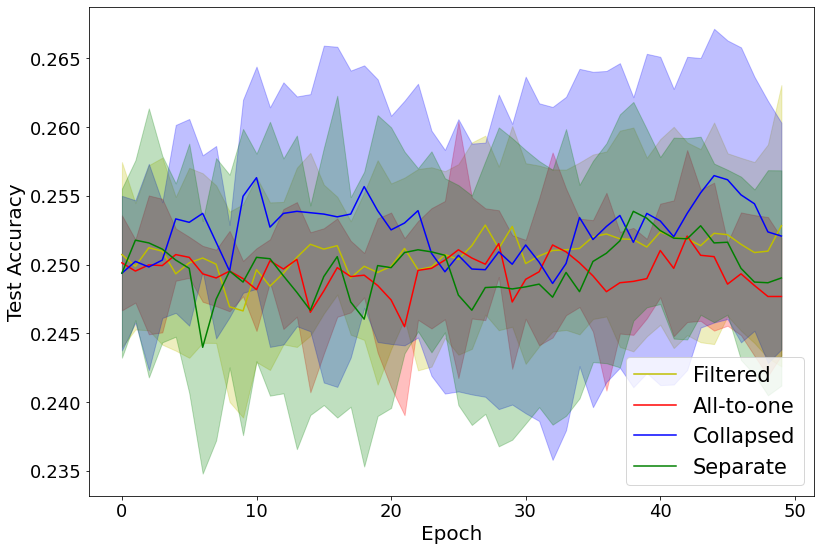

In [6]:
# draw the lines for the means
plt.plot(mean_acc_filtered.index.values, mean_acc_filtered, 'y-', label='Filtered')
plt.plot(mean_acc_alltoone.index.values, mean_acc_alltoone, 'r-', label='All-to-one')
plt.plot(mean_acc_collapsed.index.values, mean_acc_collapsed, 'b-', label='Collapsed')
plt.plot(mean_acc_separate.index.values, mean_acc_separate, 'g-', label='Separate')

# fill between the standard deviations
plt.fill_between(std_acc_filtered.index.values, mean_acc_filtered - std_acc_filtered, mean_acc_filtered + std_acc_filtered, color='y', alpha=0.25)
plt.fill_between(std_acc_alltoone.index.values, mean_acc_alltoone - std_acc_alltoone, mean_acc_alltoone + std_acc_alltoone, color='r', alpha=0.25)
plt.fill_between(std_acc_collapsed.index.values, mean_acc_collapsed - std_acc_collapsed, mean_acc_collapsed + std_acc_collapsed, color='b', alpha=0.25)
plt.fill_between(std_acc_separate.index.values, mean_acc_separate - std_acc_separate, mean_acc_separate + std_acc_separate, color='g', alpha=0.25)

plt.legend(loc="lower right", fontsize=21)
# plt.title("Test Accuracy of GCN for Synth Dataset with Different Literal Mappings", fontsize=19)
plt.xticks(fontsize=18)
plt.yticks(fontsize = 18)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Test Accuracy', fontsize=20)

# increase size of figure
figure = plt.gcf()
figure.set_size_inches(13, 9)

# save the figure
figure.savefig('../plots/experiment_data_analysis/synth/gcn_test_acc.png', dpi=300)

plt.show()

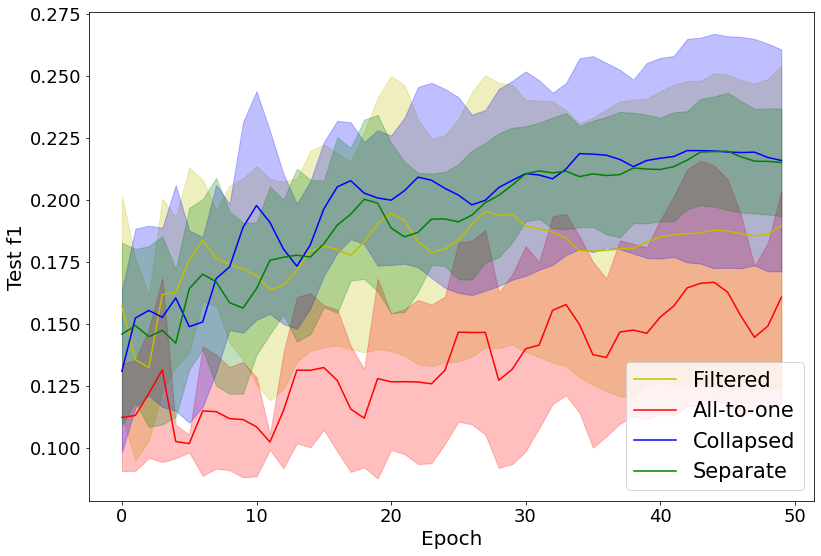

In [7]:
# draw the lines for the means
plt.plot(mean_f1_filtered.index.values, mean_f1_filtered, 'y-', label='Filtered')
plt.plot(mean_f1_alltoone.index.values, mean_f1_alltoone, 'r-', label='All-to-one')
plt.plot(mean_f1_collapsed.index.values, mean_f1_collapsed, 'b-', label='Collapsed')
plt.plot(mean_f1_separate.index.values, mean_f1_separate, 'g-', label='Separate')

# fill between the standard deviations
plt.fill_between(std_f1_filtered.index.values, mean_f1_filtered - std_f1_filtered, mean_f1_filtered + std_f1_filtered, color='y', alpha=0.25)
plt.fill_between(std_f1_alltoone.index.values, mean_f1_alltoone - std_f1_alltoone, mean_f1_alltoone + std_f1_alltoone, color='r', alpha=0.25)
plt.fill_between(std_f1_collapsed.index.values, mean_f1_collapsed - std_f1_collapsed, mean_f1_collapsed + std_f1_collapsed, color='b', alpha=0.25)
plt.fill_between(std_f1_separate.index.values, mean_f1_separate - std_f1_separate, mean_f1_separate + std_f1_separate, color='g', alpha=0.25)

plt.legend(loc="lower right", fontsize=21)
# plt.title("Test f1 of GCN for Synth Dataset with Different Literal Mappings", fontsize=19)
plt.xticks(fontsize=18)
plt.yticks(fontsize = 18)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Test f1', fontsize=20)

# increase size of figure
figure = plt.gcf()
figure.set_size_inches(13, 9)

# save the figure
figure.savefig('../plots/experiment_data_analysis/synth/gcn_test_f1.png', dpi=300)
plt.show()

### Boxplot:

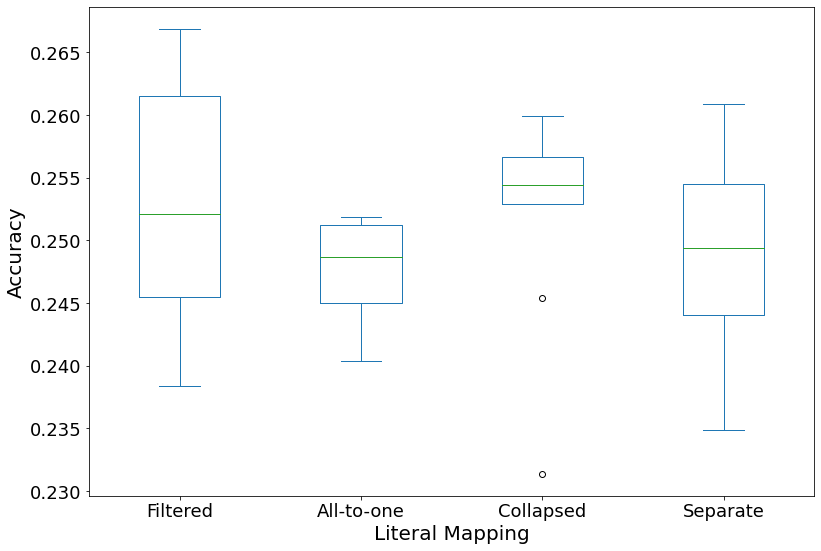

In [8]:
final_acc_all = pd.DataFrame({"Filtered": final_accuracy_test_filtered, "All-to-one": final_accuracy_test_alltoone, "Collapsed": final_accuracy_test_collapsed, "Separate": final_accuracy_test_separate})
final_acc_all[['Filtered', 'All-to-one', 'Collapsed', "Separate"]].plot(kind='box')

# add x and y labels and change font sizes:
plt.xlabel('Literal Mapping', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize = 18)

# increase size of figure
figure = plt.gcf()
figure.set_size_inches(13, 9)

# save the figure
figure.savefig('../plots/experiment_data_analysis/synth/gcn_boxplot_accuracy.png', dpi=300)
plt.show()

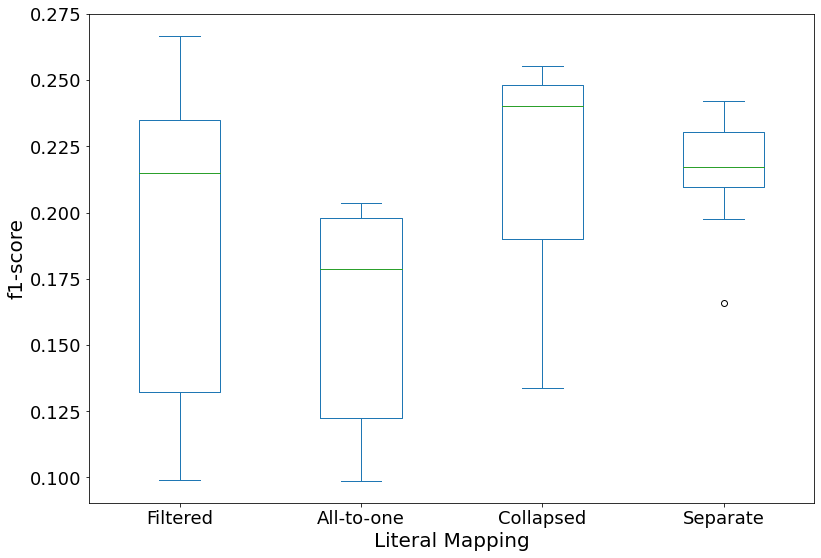

In [9]:
final_acc_all = pd.DataFrame({"Filtered": final_f1_test_filtered, "All-to-one": final_f1_test_alltoone, "Collapsed": final_f1_test_collapsed, "Separate": final_f1_test_separate})
final_acc_all[['Filtered', 'All-to-one', 'Collapsed', "Separate"]].plot(kind='box')

# add x and y labels and change font sizes:
plt.xlabel('Literal Mapping', fontsize=20)
plt.ylabel('f1-score', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize = 18)

# increase size of figure
figure = plt.gcf()
figure.set_size_inches(13, 9)

# save the figure
figure.savefig('../plots/experiment_data_analysis/synth/gcn_boxplot_f1.png', dpi=300)
plt.show()

## Perform statistical analysis:

### Normality tests (not needed):

In [10]:
print("------Accuracy------")
print("Filtered:", stats.shapiro(final_accuracy_test_filtered))
print("All-to-one:", stats.shapiro(final_accuracy_test_alltoone)) # not from a normal dist
print("Collapsed:", stats.shapiro(final_accuracy_test_collapsed))
print("Separate:", stats.shapiro(final_accuracy_test_separate))

print("------f1------")
print("Filtered:", stats.shapiro(final_f1_test_filtered))
print("All-to-one:", stats.shapiro(final_f1_test_alltoone)) # not from a normal dist
print("Collapsed:", stats.shapiro(final_f1_test_collapsed))
print("Separate:", stats.shapiro(final_f1_test_separate))

------Accuracy------
Filtered: ShapiroResult(statistic=0.9435918927192688, pvalue=0.5936282277107239)
All-to-one: ShapiroResult(statistic=0.846524178981781, pvalue=0.052805814892053604)
Collapsed: ShapiroResult(statistic=0.7618134021759033, pvalue=0.004970564041286707)
Separate: ShapiroResult(statistic=0.9880210161209106, pvalue=0.9937745928764343)
------f1------
Filtered: ShapiroResult(statistic=0.8767434358596802, pvalue=0.11969921737909317)
All-to-one: ShapiroResult(statistic=0.8392298221588135, pvalue=0.043196503072977066)
Collapsed: ShapiroResult(statistic=0.8215640187263489, pvalue=0.02646968513727188)
Separate: ShapiroResult(statistic=0.9037490487098694, pvalue=0.2407504767179489)


### Mann-Whitney U tests:

In [11]:
# combinations (for all of these, do a test between both the accuracy and the f1)

# filtered - all-to-one
print("Accuracy, Filtered - All-to-one: ", stats.mannwhitneyu(final_accuracy_test_filtered, final_accuracy_test_alltoone))
print("f1-score, Filtered - All-to-one: ", stats.mannwhitneyu(final_f1_test_filtered, final_f1_test_alltoone))

# filtered - collapsed
print("Accuracy, Filtered - Collapsed: ", stats.mannwhitneyu(final_accuracy_test_filtered, final_accuracy_test_collapsed))
print("f1-score, Filtered - Collapsed: ", stats.mannwhitneyu(final_f1_test_filtered, final_f1_test_collapsed))

# filtered - separate
print("Accuracy, Filtered - Separate: ", stats.mannwhitneyu(final_accuracy_test_filtered, final_accuracy_test_separate))
print("f1-score, Filtered - Separate: ", stats.mannwhitneyu(final_f1_test_filtered, final_f1_test_separate))

# all-to-one - collapsed
print("Accuracy, All-to-one - Collapsed: ", stats.mannwhitneyu(final_accuracy_test_alltoone, final_accuracy_test_collapsed))
print("f1-score, All-to-one - Collapsed: ", stats.mannwhitneyu(final_f1_test_alltoone, final_f1_test_collapsed))

# all-to-one - separate
print("Accuracy, All-to-one - Separate: ", stats.mannwhitneyu(final_accuracy_test_alltoone, final_accuracy_test_separate))
print("f1-score, All-to-one - Separate: ", stats.mannwhitneyu(final_f1_test_alltoone, final_f1_test_separate))
      
# collapsed - separate
print("Accuracy, Collapsed - Separate: ", stats.mannwhitneyu(final_accuracy_test_collapsed, final_accuracy_test_separate))
print("f1-score, Collapsed - Separate: ", stats.mannwhitneyu(final_f1_test_collapsed, final_f1_test_separate))

Accuracy, Filtered - All-to-one:  MannwhitneyuResult(statistic=65.0, pvalue=0.2723141220596529)
f1-score, Filtered - All-to-one:  MannwhitneyuResult(statistic=66.0, pvalue=0.24132159301718004)
Accuracy, Filtered - Collapsed:  MannwhitneyuResult(statistic=48.5, pvalue=0.939606870353425)
f1-score, Filtered - Collapsed:  MannwhitneyuResult(statistic=35.0, pvalue=0.27303633975118835)
Accuracy, Filtered - Separate:  MannwhitneyuResult(statistic=61.0, pvalue=0.4270075030844239)
f1-score, Filtered - Separate:  MannwhitneyuResult(statistic=47.0, pvalue=0.8501067391385259)
Accuracy, All-to-one - Collapsed:  MannwhitneyuResult(statistic=17.0, pvalue=0.013768007827140995)
f1-score, All-to-one - Collapsed:  MannwhitneyuResult(statistic=19.0, pvalue=0.0211339281291611)
Accuracy, All-to-one - Separate:  MannwhitneyuResult(statistic=42.0, pvalue=0.5701699724963722)
f1-score, All-to-one - Separate:  MannwhitneyuResult(statistic=9.0, pvalue=0.0022022199424970783)
Accuracy, Collapsed - Separate:  Mannwh

Everything is significantly better than the separate one!!

### Apply majority voting (for other classification tests):

In [12]:
# read in the class assignments (do this for the test data):
preds_filtered_1 = pd.read_csv("../results/GCN/test_synth_filtered_final/synth_1/predictions_test.csv")
preds_filtered_2 = pd.read_csv("../results/GCN/test_synth_filtered_final/synth_2/predictions_test.csv")
preds_filtered_3 = pd.read_csv("../results/GCN/test_synth_filtered_final/synth_3/predictions_test.csv")
preds_filtered_4 = pd.read_csv("../results/GCN/test_synth_filtered_final/synth_4/predictions_test.csv")
preds_filtered_5 = pd.read_csv("../results/GCN/test_synth_filtered_final/synth_5/predictions_test.csv")
preds_filtered_6 = pd.read_csv("../results/GCN/test_synth_filtered_final/synth_6/predictions_test.csv")
preds_filtered_7 = pd.read_csv("../results/GCN/test_synth_filtered_final/synth_7/predictions_test.csv")
preds_filtered_8 = pd.read_csv("../results/GCN/test_synth_filtered_final/synth_8/predictions_test.csv")
preds_filtered_9 = pd.read_csv("../results/GCN/test_synth_filtered_final/synth_9/predictions_test.csv")
preds_filtered_10 = pd.read_csv("../results/GCN/test_synth_filtered_final/synth_10/predictions_test.csv")

preds_alltoone_1 = pd.read_csv("../results/GCN/test_synth_all-to-one_final/synth_1/predictions_test.csv")
preds_alltoone_2 = pd.read_csv("../results/GCN/test_synth_all-to-one_final/synth_2/predictions_test.csv")
preds_alltoone_3 = pd.read_csv("../results/GCN/test_synth_all-to-one_final/synth_3/predictions_test.csv")
preds_alltoone_4 = pd.read_csv("../results/GCN/test_synth_all-to-one_final/synth_4/predictions_test.csv")
preds_alltoone_5 = pd.read_csv("../results/GCN/test_synth_all-to-one_final/synth_5/predictions_test.csv")
preds_alltoone_6 = pd.read_csv("../results/GCN/test_synth_all-to-one_final/synth_6/predictions_test.csv")
preds_alltoone_7 = pd.read_csv("../results/GCN/test_synth_all-to-one_final/synth_7/predictions_test.csv")
preds_alltoone_8 = pd.read_csv("../results/GCN/test_synth_all-to-one_final/synth_8/predictions_test.csv")
preds_alltoone_9 = pd.read_csv("../results/GCN/test_synth_all-to-one_final/synth_9/predictions_test.csv")
preds_alltoone_10 = pd.read_csv("../results/GCN/test_synth_all-to-one_final/synth_10/predictions_test.csv")

preds_collapsed_1 = pd.read_csv("../results/GCN/test_synth_collapsed_final/synth_1/predictions_test.csv")
preds_collapsed_2 = pd.read_csv("../results/GCN/test_synth_collapsed_final/synth_2/predictions_test.csv")
preds_collapsed_3 = pd.read_csv("../results/GCN/test_synth_collapsed_final/synth_3/predictions_test.csv")
preds_collapsed_4 = pd.read_csv("../results/GCN/test_synth_collapsed_final/synth_4/predictions_test.csv")
preds_collapsed_5 = pd.read_csv("../results/GCN/test_synth_collapsed_final/synth_5/predictions_test.csv")
preds_collapsed_6 = pd.read_csv("../results/GCN/test_synth_collapsed_final/synth_6/predictions_test.csv")
preds_collapsed_7 = pd.read_csv("../results/GCN/test_synth_collapsed_final/synth_7/predictions_test.csv")
preds_collapsed_8 = pd.read_csv("../results/GCN/test_synth_collapsed_final/synth_8/predictions_test.csv")
preds_collapsed_9 = pd.read_csv("../results/GCN/test_synth_collapsed_final/synth_9/predictions_test.csv")
preds_collapsed_10 = pd.read_csv("../results/GCN/test_synth_collapsed_final/synth_10/predictions_test.csv")

preds_separate_1 = pd.read_csv("../results/GCN/test_synth_separate_final/synth_1/predictions_test.csv")
preds_separate_2 = pd.read_csv("../results/GCN/test_synth_separate_final/synth_2/predictions_test.csv")
preds_separate_3 = pd.read_csv("../results/GCN/test_synth_separate_final/synth_3/predictions_test.csv")
preds_separate_4 = pd.read_csv("../results/GCN/test_synth_separate_final/synth_4/predictions_test.csv")
preds_separate_5 = pd.read_csv("../results/GCN/test_synth_separate_final/synth_5/predictions_test.csv")
preds_separate_6 = pd.read_csv("../results/GCN/test_synth_separate_final/synth_6/predictions_test.csv")
preds_separate_7 = pd.read_csv("../results/GCN/test_synth_separate_final/synth_7/predictions_test.csv")
preds_separate_8 = pd.read_csv("../results/GCN/test_synth_separate_final/synth_8/predictions_test.csv")
preds_separate_9 = pd.read_csv("../results/GCN/test_synth_separate_final/synth_9/predictions_test.csv")
preds_separate_10 = pd.read_csv("../results/GCN/test_synth_separate_final/synth_10/predictions_test.csv")

In [13]:
preds_filtered_1.rename(columns={"PredictedLabel":"P1"}, inplace=True)
preds_filtered_2.rename(columns={"PredictedLabel":"P2"}, inplace=True)
preds_filtered_3.rename(columns={"PredictedLabel":"P3"}, inplace=True)
preds_filtered_4.rename(columns={"PredictedLabel":"P4"}, inplace=True)
preds_filtered_5.rename(columns={"PredictedLabel":"P5"}, inplace=True)
preds_filtered_6.rename(columns={"PredictedLabel":"P6"}, inplace=True)
preds_filtered_7.rename(columns={"PredictedLabel":"P7"}, inplace=True)
preds_filtered_8.rename(columns={"PredictedLabel":"P8"}, inplace=True)
preds_filtered_9.rename(columns={"PredictedLabel":"P9"}, inplace=True)
preds_filtered_10.rename(columns={"PredictedLabel":"P10"}, inplace=True)

preds_alltoone_1.rename(columns={"PredictedLabel":"P1"}, inplace=True)
preds_alltoone_2.rename(columns={"PredictedLabel":"P2"}, inplace=True)
preds_alltoone_3.rename(columns={"PredictedLabel":"P3"}, inplace=True)
preds_alltoone_4.rename(columns={"PredictedLabel":"P4"}, inplace=True)
preds_alltoone_5.rename(columns={"PredictedLabel":"P5"}, inplace=True)
preds_alltoone_6.rename(columns={"PredictedLabel":"P6"}, inplace=True)
preds_alltoone_7.rename(columns={"PredictedLabel":"P7"}, inplace=True)
preds_alltoone_8.rename(columns={"PredictedLabel":"P8"}, inplace=True)
preds_alltoone_9.rename(columns={"PredictedLabel":"P9"}, inplace=True)
preds_alltoone_10.rename(columns={"PredictedLabel":"P10"}, inplace=True)

preds_collapsed_1.rename(columns={"PredictedLabel":"P1"}, inplace=True)
preds_collapsed_2.rename(columns={"PredictedLabel":"P2"}, inplace=True)
preds_collapsed_3.rename(columns={"PredictedLabel":"P3"}, inplace=True)
preds_collapsed_4.rename(columns={"PredictedLabel":"P4"}, inplace=True)
preds_collapsed_5.rename(columns={"PredictedLabel":"P5"}, inplace=True)
preds_collapsed_6.rename(columns={"PredictedLabel":"P6"}, inplace=True)
preds_collapsed_7.rename(columns={"PredictedLabel":"P7"}, inplace=True)
preds_collapsed_8.rename(columns={"PredictedLabel":"P8"}, inplace=True)
preds_collapsed_9.rename(columns={"PredictedLabel":"P9"}, inplace=True)
preds_collapsed_10.rename(columns={"PredictedLabel":"P10"}, inplace=True)

preds_separate_1.rename(columns={"PredictedLabel":"P1"}, inplace=True)
preds_separate_2.rename(columns={"PredictedLabel":"P2"}, inplace=True)
preds_separate_3.rename(columns={"PredictedLabel":"P3"}, inplace=True)
preds_separate_4.rename(columns={"PredictedLabel":"P4"}, inplace=True)
preds_separate_5.rename(columns={"PredictedLabel":"P5"}, inplace=True)
preds_separate_6.rename(columns={"PredictedLabel":"P6"}, inplace=True)
preds_separate_7.rename(columns={"PredictedLabel":"P7"}, inplace=True)
preds_separate_8.rename(columns={"PredictedLabel":"P8"}, inplace=True)
preds_separate_9.rename(columns={"PredictedLabel":"P9"}, inplace=True)
preds_separate_10.rename(columns={"PredictedLabel":"P10"}, inplace=True)

In [14]:
predictions_all_filtered = preds_filtered_1

for dataframe in [preds_filtered_2, preds_filtered_3, preds_filtered_4, preds_filtered_5, preds_filtered_6, preds_filtered_7, preds_filtered_8, preds_filtered_9, preds_filtered_10]:
    predictions_all_filtered= pd.merge(predictions_all_filtered, dataframe)
                                      
predictions_all_filtered.set_index('ID', inplace=True)

# ----------------

predictions_all_alltoone = preds_alltoone_1

for dataframe in [preds_alltoone_2, preds_alltoone_3, preds_alltoone_4, preds_alltoone_5, preds_alltoone_6, preds_alltoone_7, preds_alltoone_8, preds_alltoone_9, preds_alltoone_10]:
    predictions_all_alltoone= pd.merge(predictions_all_alltoone, dataframe)
                                      
predictions_all_alltoone.set_index('ID', inplace=True)

# ----------------

predictions_all_collapsed = preds_collapsed_1

for dataframe in [preds_collapsed_2, preds_collapsed_3, preds_collapsed_4, preds_collapsed_5, preds_collapsed_6, preds_collapsed_7, preds_collapsed_8, preds_collapsed_9, preds_collapsed_10]:
    predictions_all_collapsed = pd.merge(predictions_all_collapsed, dataframe)
                                      
predictions_all_collapsed.set_index('ID', inplace=True)

# ----------------

predictions_all_separate = preds_separate_1

for dataframe in [preds_separate_2, preds_separate_3, preds_separate_4, preds_separate_5, preds_separate_6, preds_separate_7, preds_separate_8, preds_separate_9, preds_separate_10]:
    predictions_all_separate = pd.merge(predictions_all_separate, dataframe)
                                      
predictions_all_separate.set_index('ID', inplace=True)

In [15]:
predictions_filtered_mode = predictions_all_filtered[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']].mode(axis='columns')
predictions_alltoone_mode = predictions_all_alltoone[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']].mode(axis='columns')
predictions_collapsed_mode = predictions_all_collapsed[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']].mode(axis='columns')
predictions_separate_mode = predictions_all_separate[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']].mode(axis='columns')

In [16]:
print(predictions_filtered_mode.shape)
print(predictions_alltoone_mode.shape)
print(predictions_collapsed_mode.shape)
print(predictions_separate_mode.shape)

(2001, 3)
(2001, 3)
(2001, 3)
(2001, 3)


In [17]:
def make_choice(col_0, col_1, col_2):
    if not math.isnan(col_1):
        if not math.isnan(col_2):
            choice_three = random.choice([0,1,2])
            
            if choice_three == 0:
                return int(col_0)
            elif choice_three == 1:
                return int(col_1)
            else:
                return int(col_2)
        else:
            if random.choice([0,1]) == 1:
                return int(col_1)
            else:
                return int(col_0)   
    else:
        return int(col_0)

predictions_all_filtered['MJ'] = predictions_filtered_mode.apply(lambda x: make_choice(col_0=x[0], col_1 = x[1], col_2 = x[2]), axis=1)
predictions_all_alltoone['MJ'] = predictions_alltoone_mode.apply(lambda x: make_choice(col_0=x[0], col_1 = x[1], col_2 = x[2]), axis=1)
predictions_all_collapsed['MJ'] = predictions_collapsed_mode.apply(lambda x: make_choice(col_0=x[0], col_1 = x[1], col_2 = x[2]), axis=1)
predictions_all_separate['MJ'] = predictions_separate_mode.apply(lambda x: make_choice(col_0=x[0], col_1 = x[1], col_2 = x[2]), axis=1)

In [18]:
# these will all be different because they were read in differently:

filtered_file = open("../results/GCN/test_synth_filtered_final/label_mapping.json")
filtered_mapping = json.load(filtered_file)
print(filtered_mapping)
print()

alltoone_file = open("../results/GCN/test_synth_all-to-one_final/label_mapping.json")
alltoone_mapping = json.load(alltoone_file)
print(alltoone_mapping)
print()

collapsed_file = open("../results/GCN/test_synth_collapsed_final/label_mapping.json")
collapsed_mapping = json.load(collapsed_file)
print(collapsed_mapping)
print()

separate_file = open("../results/GCN/test_synth_separate_final/label_mapping.json")
separate_mapping = json.load(separate_file)
print(separate_mapping)
print()

{'https://example.org/NODE_CLASS_0': 0, 'https://example.org/NODE_CLASS_1': 1, 'https://example.org/NODE_CLASS_2': 2, 'https://example.org/NODE_CLASS_3': 3}

{'https://example.org/NODE_CLASS_2': 0, 'https://example.org/NODE_CLASS_0': 1, 'https://example.org/NODE_CLASS_3': 2, 'https://example.org/NODE_CLASS_1': 3}

{'https://example.org/NODE_CLASS_1': 0, 'https://example.org/NODE_CLASS_3': 1, 'https://example.org/NODE_CLASS_2': 2, 'https://example.org/NODE_CLASS_0': 3}

{'https://example.org/NODE_CLASS_0': 0, 'https://example.org/NODE_CLASS_3': 1, 'https://example.org/NODE_CLASS_1': 2, 'https://example.org/NODE_CLASS_2': 3}



In [19]:
# revert these (so we can turn the mapping back around!)
filtered_mapping_rev = {value: key for key, value in filtered_mapping.items()}
alltoone_mapping_rev = {value: key for key, value in alltoone_mapping.items()}
collapsed_mapping_rev = {value: key for key, value in collapsed_mapping.items()}
separate_mapping_rev = {value: key for key, value in separate_mapping.items()}

In [20]:
# change it back to the original classes:
predictions_all_filtered['MJ_fil'] = predictions_all_filtered['MJ'].map(filtered_mapping_rev)
predictions_all_alltoone['MJ_ato'] = predictions_all_alltoone['MJ'].map(alltoone_mapping_rev)
predictions_all_collapsed['MJ_col'] = predictions_all_collapsed['MJ'].map(collapsed_mapping_rev)
predictions_all_separate['MJ_sep'] = predictions_all_separate['MJ'].map(separate_mapping_rev)

In [21]:
# put the actual entities as the index for everything!
predictions_all_filtered.set_index('Entity', inplace=True)
predictions_all_alltoone.set_index('Entity', inplace=True)
predictions_all_collapsed.set_index('Entity', inplace=True)
predictions_all_separate.set_index('Entity', inplace=True)

In [22]:
predictions_all_filtered.head(5)

,P1,TrueLabel,P2,P3,P4,P5,P6,P7,P8,P9,P10,MJ,MJ_fil
Entity,,,,,,,,,,,,,
https://example.org/NODE_14449,3,1,2,3,3,0,0,2,1,0,3,3,https://example.org/NODE_CLASS_3
https://example.org/NODE_45997,1,2,0,2,3,0,0,2,0,2,3,0,https://example.org/NODE_CLASS_0
https://example.org/NODE_62987,1,1,2,1,3,2,0,2,0,2,3,2,https://example.org/NODE_CLASS_2
https://example.org/NODE_47501,3,0,0,1,3,0,0,2,3,0,3,3,https://example.org/NODE_CLASS_3
https://example.org/NODE_74144,0,1,1,1,3,2,0,2,2,3,3,3,https://example.org/NODE_CLASS_3


In [23]:
# now, link everything to their actual entity and add everything in one dataframe --> then we can start comparing!
all_predictions = pd.concat([predictions_all_filtered['MJ_fil'], predictions_all_alltoone['MJ_ato'], predictions_all_collapsed['MJ_col'], predictions_all_separate['MJ_sep']], axis=1, keys=['filtered', 'all-to-one', 'collapsed', 'separate'])
all_predictions.head(5)

,filtered,all-to-one,collapsed,separate
Entity,,,,
https://example.org/NODE_14449,https://example.org/NODE_CLASS_3,https://example.org/NODE_CLASS_1,https://example.org/NODE_CLASS_1,https://example.org/NODE_CLASS_0
https://example.org/NODE_45997,https://example.org/NODE_CLASS_0,https://example.org/NODE_CLASS_1,https://example.org/NODE_CLASS_1,https://example.org/NODE_CLASS_3
https://example.org/NODE_62987,https://example.org/NODE_CLASS_2,https://example.org/NODE_CLASS_1,https://example.org/NODE_CLASS_2,https://example.org/NODE_CLASS_3
https://example.org/NODE_47501,https://example.org/NODE_CLASS_3,https://example.org/NODE_CLASS_1,https://example.org/NODE_CLASS_0,https://example.org/NODE_CLASS_0
https://example.org/NODE_74144,https://example.org/NODE_CLASS_3,https://example.org/NODE_CLASS_0,https://example.org/NODE_CLASS_1,https://example.org/NODE_CLASS_0


In [24]:
official_mapping = {'https://example.org/NODE_CLASS_0': 0, 'https://example.org/NODE_CLASS_1': 1, 'https://example.org/NODE_CLASS_2': 2, 'https://example.org/NODE_CLASS_3': 3}

In [25]:
all_predictions['filtered'] = all_predictions['filtered'].map(official_mapping)
all_predictions['all-to-one'] = all_predictions['all-to-one'].map(official_mapping)
all_predictions['collapsed'] = all_predictions['collapsed'].map(official_mapping)
all_predictions['separate'] = all_predictions['separate'].map(official_mapping)

In [26]:
true_lab = predictions_all_filtered['TrueLabel'].map(filtered_mapping_rev)
all_predictions['true_label'] = true_lab.map(official_mapping)

In [27]:
all_predictions.head(10)

,filtered,all-to-one,collapsed,separate,true_label
Entity,,,,,
https://example.org/NODE_14449,3,1,1,0,1
https://example.org/NODE_45997,0,1,1,3,2
https://example.org/NODE_62987,2,1,2,3,1
https://example.org/NODE_47501,3,1,0,0,0
https://example.org/NODE_74144,3,0,1,0,1
https://example.org/NODE_40033,3,1,1,0,0
https://example.org/NODE_32665,0,1,3,3,0
https://example.org/NODE_45101,3,1,1,2,0
https://example.org/NODE_52514,3,1,1,1,2


### Other tests (mlstats package):

In [28]:
print("Number predicted classes in filtered: ", len(np.unique(all_predictions['filtered'].to_numpy())))
print("Number predicted classes in all-to-one: ", len(np.unique(all_predictions['all-to-one'].to_numpy())))
print("Number predicted classes in collapsed: ", len(np.unique(all_predictions['collapsed'].to_numpy())))
print("Number predicted classes in separate: ", len(np.unique(all_predictions['separate'].to_numpy())))

Number predicted classes in filtered:  4
Number predicted classes in all-to-one:  4
Number predicted classes in collapsed:  4
Number predicted classes in separate:  4


In [29]:
all_predictions_tf = all_predictions.copy()

In [30]:
def same(label, true_label):
    return int(label == true_label)

all_predictions_tf['filtered'] = all_predictions.apply(lambda x: same(x['filtered'], x['true_label']), axis=1)
all_predictions_tf['all-to-one'] = all_predictions.apply(lambda x: same(x['all-to-one'], x['true_label']), axis=1)
all_predictions_tf['collapsed'] = all_predictions.apply(lambda x: same(x['collapsed'], x['true_label']), axis=1)
all_predictions_tf['separate'] = all_predictions.apply(lambda x: same(x['separate'], x['true_label']), axis=1)

In [31]:
all_predictions_tf[['filtered', 'all-to-one', 'collapsed', 'separate']].head(10)

,filtered,all-to-one,collapsed,separate
Entity,,,,
https://example.org/NODE_14449,0,1,1,0
https://example.org/NODE_45997,0,0,0,0
https://example.org/NODE_62987,0,1,0,0
https://example.org/NODE_47501,0,0,1,1
https://example.org/NODE_74144,0,0,1,0
https://example.org/NODE_40033,0,0,0,1
https://example.org/NODE_32665,1,0,0,0
https://example.org/NODE_45101,0,0,0,0
https://example.org/NODE_52514,0,0,0,0


In [32]:
modcomp.cochran_q(all_predictions_tf[['filtered', 'all-to-one', 'collapsed', 'separate']].T.to_numpy())

TestResults(p=0.9234268919097544, Q=0.47924528301886793)

In [33]:
# filtered - all-to-one
print("Exact McNemar between Correct/Incorrect, Filtered - All-to-one: ", modcomp.mcnemar(all_predictions_tf['filtered'].to_numpy(), all_predictions_tf['all-to-one'].to_numpy()))

# filtered - collapsed
print("Exact McNemar between Correct/Incorrect, Filtered - Collapsed: ", modcomp.mcnemar(all_predictions_tf['filtered'].to_numpy(), all_predictions_tf['collapsed'].to_numpy()))

# filtered - separate
print("Exact McNemar between Correct/Incorrect, Filtered - Separate: ", modcomp.mcnemar(all_predictions_tf['filtered'].to_numpy(), all_predictions_tf['separate'].to_numpy()))

# all-to-one - collapsed
print("Exact McNemar between Correct/Incorrect, All-to-one - Collapsed: ", modcomp.mcnemar(all_predictions_tf['all-to-one'].to_numpy(), all_predictions_tf['collapsed'].to_numpy()))

# all-to-one - separate
print("Exact McNemar between Correct/Incorrect, All-to-one - Separate: ", modcomp.mcnemar(all_predictions_tf['all-to-one'].to_numpy(), all_predictions_tf['separate'].to_numpy()))

# collapsed - separate
print("Exact McNemar between Correct/Incorrect, Collapsed - Separate: ", modcomp.mcnemar(all_predictions_tf['collapsed'].to_numpy(), all_predictions_tf['separate'].to_numpy()))

Exact McNemar between Correct/Incorrect, Filtered - All-to-one:  TestResults(p=2.191668941913783e-189, Q=861.5951557093425)
Exact McNemar between Correct/Incorrect, Filtered - Collapsed:  TestResults(p=2.0291503983388075e-184, Q=838.7502067824648)
Exact McNemar between Correct/Incorrect, Filtered - Separate:  TestResults(p=3.899381346418871e-172, Q=782.2513287775247)
Exact McNemar between Correct/Incorrect, All-to-one - Collapsed:  TestResults(p=4.409070073096434e-125, Q=565.885452462772)
Exact McNemar between Correct/Incorrect, All-to-one - Separate:  TestResults(p=9.412740267553894e-171, Q=775.8918083462133)
Exact McNemar between Correct/Incorrect, Collapsed - Separate:  TestResults(p=7.899758365788083e-172, Q=780.8411000763942)


In [34]:
# filtered - all-to-one
print("Stuart-Maxwell, Filtered - All-to-one: ", modcomp.stuart_maxwell(all_predictions['filtered'].to_numpy(), all_predictions['all-to-one'].to_numpy(), 4))

# filtered - collapsed
print("Stuart-Maxwell, Filtered - Collapsed: ", modcomp.stuart_maxwell(all_predictions['filtered'].to_numpy(), all_predictions['collapsed'].to_numpy(), 4))

# filtered - separate
print("Stuart-Maxwell, Filtered - Separate: ", modcomp.stuart_maxwell(all_predictions['filtered'].to_numpy(), all_predictions['separate'].to_numpy(), 4))

# all-to-one - collapsed
print("Stuart-Maxwell, All-to-one - Collapsed: ", modcomp.stuart_maxwell(all_predictions['all-to-one'].to_numpy(), all_predictions['collapsed'].to_numpy(), 4))

# all-to-one - separate
print("Stuart-Maxwell, All-to-one - Separate: ", modcomp.stuart_maxwell(all_predictions['all-to-one'].to_numpy(), all_predictions['separate'].to_numpy(), 4))

# collapsed - separate
print("Stuart-Maxwell, Collapsed - Separate: ", modcomp.stuart_maxwell(all_predictions['collapsed'].to_numpy(), all_predictions['separate'].to_numpy(), 4))

Stuart-Maxwell, Filtered - All-to-one:  TestResults(p=0.0, Q=1605.9506266602566)
Stuart-Maxwell, Filtered - Collapsed:  TestResults(p=8.676923826342332e-244, Q=1125.9167353683765)
Stuart-Maxwell, Filtered - Separate:  TestResults(p=1.5798080467993454e-53, Q=248.2301958834475)
Stuart-Maxwell, All-to-one - Collapsed:  TestResults(p=1.4084878781973883e-68, Q=317.78258817176356)
Stuart-Maxwell, All-to-one - Separate:  TestResults(p=1.2014625780920633e-282, Q=1305.0148309603155)
Stuart-Maxwell, Collapsed - Separate:  TestResults(p=3.413176172173609e-170, Q=786.642373688559)


In [35]:
from statsmodels.stats.contingency_tables import mcnemar
print("Filtered - All-to-one: ", mcnemar(pd.crosstab(all_predictions_tf['filtered'], all_predictions_tf['all-to-one']).to_numpy(), exact=True))
print(pd.crosstab(all_predictions_tf['filtered'], all_predictions_tf['all-to-one']))

print()
print("Filtered - Collapsed: ",mcnemar(pd.crosstab(all_predictions_tf['filtered'], all_predictions_tf['collapsed']).to_numpy(), exact=True))
print(pd.crosstab(all_predictions_tf['filtered'], all_predictions_tf['collapsed']))

print()
print("Filtered - Separate: ",mcnemar(pd.crosstab(all_predictions_tf['filtered'], all_predictions_tf['separate']).to_numpy(), exact=True))
print(pd.crosstab(all_predictions_tf['filtered'], all_predictions_tf['separate']))

print()
print("All-to-one - Collapsed: ",mcnemar(pd.crosstab(all_predictions_tf['all-to-one'], all_predictions_tf['collapsed']).to_numpy(), exact=True))
print(pd.crosstab(all_predictions_tf['all-to-one'], all_predictions_tf['collapsed']))

print()
print("All-to-one - Separate: ",mcnemar(pd.crosstab(all_predictions_tf['all-to-one'], all_predictions_tf['separate']).to_numpy(), exact=True))
print(pd.crosstab(all_predictions_tf['all-to-one'], all_predictions_tf['separate']))

print()
print("Collapsed - Separate: ",mcnemar(pd.crosstab(all_predictions_tf['collapsed'], all_predictions_tf['separate']).to_numpy(), exact=True))
print(pd.crosstab(all_predictions_tf['collapsed'], all_predictions_tf['separate']))

Filtered - All-to-one:  pvalue      0.6797687539340324
statistic   416.0
all-to-one     0    1
filtered             
0           1077  429
1            416   79

Filtered - Collapsed:  pvalue      0.9151148479971937
statistic   394.0
collapsed     0    1
filtered            
0          1108  398
1           394  101

Filtered - Separate:  pvalue      0.908687632966243
statistic   340.0
separate     0    1
filtered           
0         1166  340
1          344  151

All-to-one - Collapsed:  pvalue      0.6164725642490375
statistic   123.0
collapsed      0    1
all-to-one           
0           1370  123
1            132  376

All-to-one - Separate:  pvalue      0.5473761534056223
statistic   345.0
separate       0    1
all-to-one           
0           1148  345
1            362  146

Collapsed - Separate:  pvalue      0.7901851218015907
statistic   342.0
separate      0    1
collapsed           
0          1160  342
1           350  149
